In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

<h1 style="color: white; background-color: #4CAF50; padding: 10px; text-align: center; border: 3px solid #3e8e41; border-radius: 10px;">
    Customer Segmentation using Clustering
</h1>

<p style="color: black; background-color: #f0f0f0; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    Introduce the dataset (Mall Customers) and discuss its columns like Age, Annual Income, Spending Score, and Gender. The primary goal is to perform customer segmentation using these variables.
</p>


<p style="color: white; background-color: #333; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    Customer segmentation is a crucial aspect of marketing and business strategy that involves dividing a customer base into distinct groups based on various characteristics. This project aims to utilize clustering techniques to identify and analyze these segments, allowing businesses to tailor their marketing efforts and improve customer satisfaction. By leveraging customer data, we can uncover hidden patterns and preferences, facilitating more effective communication and product offerings.
</p>

<p style="color: white; background-color: #333; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    The primary objective of this project is to develop a robust customer segmentation model using clustering algorithms such as K-means or hierarchical clustering. The model will group customers based on factors such as demographics, purchasing behavior, and preferences. This segmentation will enable businesses to:
    <ul>
        <li>Identify high-value customer segments for targeted marketing campaigns.</li>
        <li>Enhance customer engagement by personalizing services and products.</li>
        <li>Improve customer retention by understanding and addressing the specific needs of each segment.</li>
        <li>Optimize resource allocation by focusing efforts on the most profitable segments.</li>
    </ul>
</p>


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

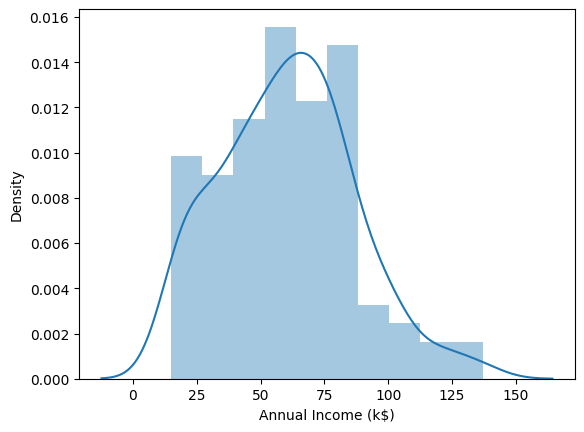

In [4]:
sns.distplot(df['Annual Income (k$)'])

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


<p style="color: black; background-color: #f0f0f0; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    The distribution plot helps to visualize the spread and shape of the data revealing insights like skewness or outliers.


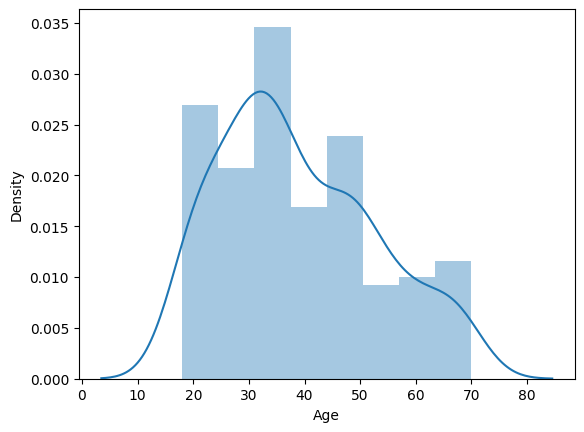

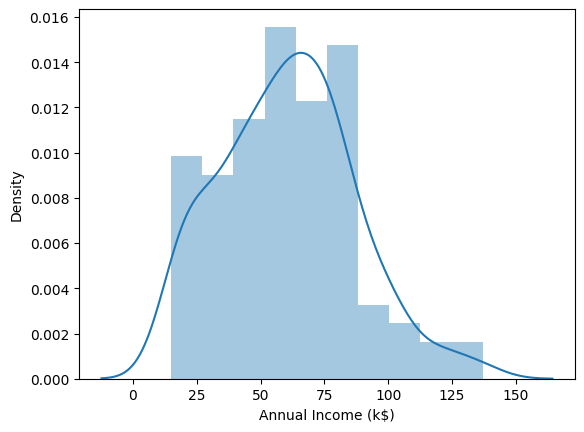

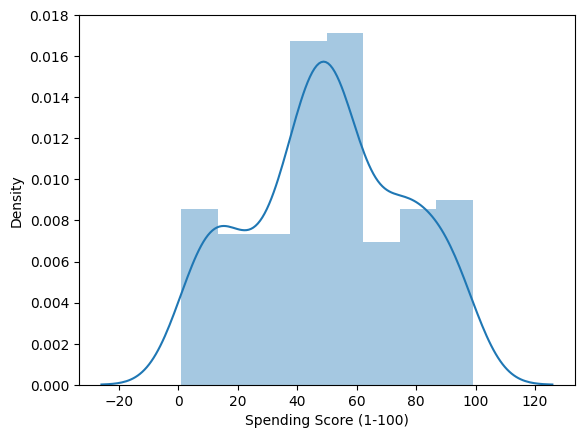

In [6]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])


<p style="color: black; background-color: #f0f0f0; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    Boxplots by gender allow comparison of income and spending behavior across genders, helping identify trends and differences between male and female customers.


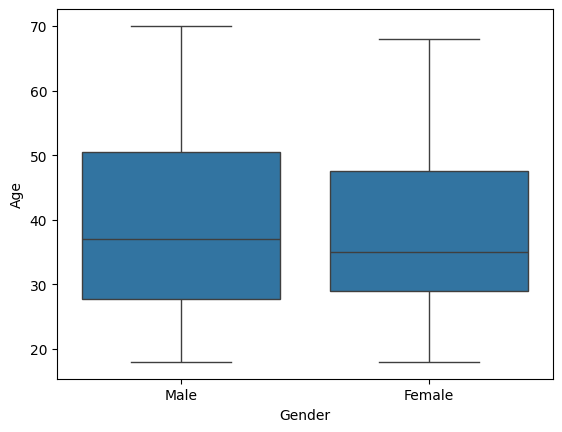

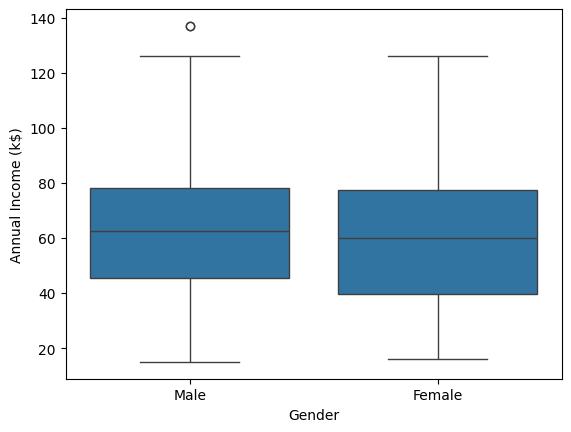

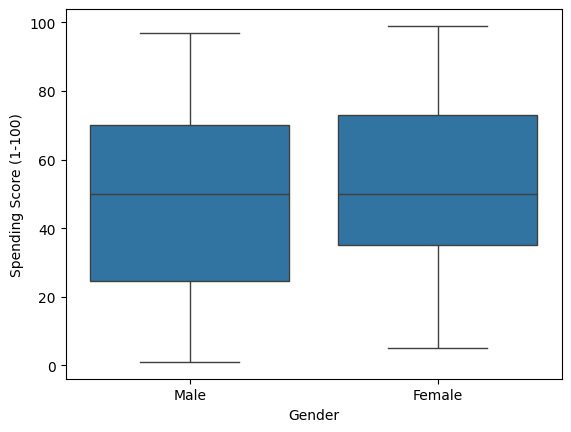

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [9]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


<p style="color: black; background-color: #f0f0f0; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    Pairplots help visualize the relationships between multiple numerical variables, and coloring by gender adds another layer of analysis by showing how these relationships differ between male and female customers.


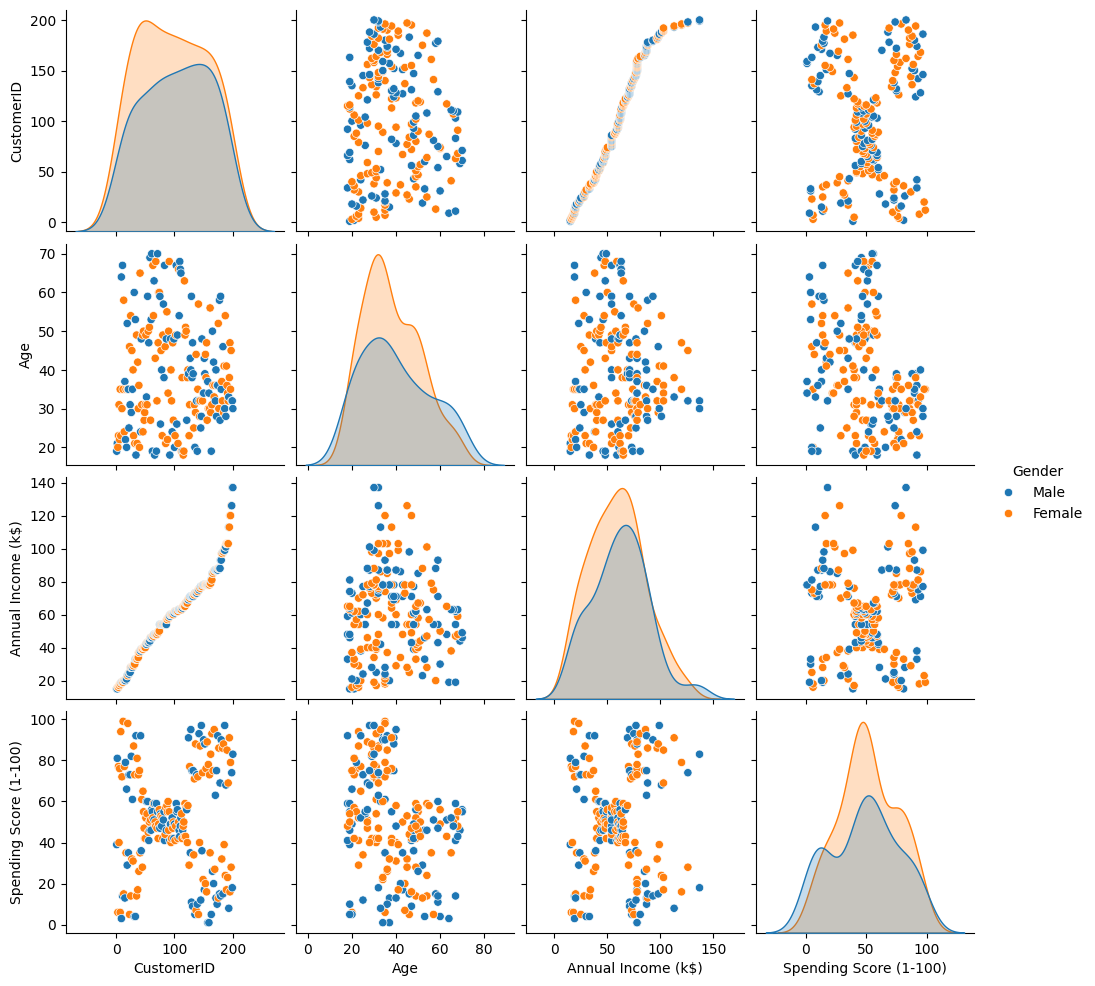

In [10]:
sns.pairplot(df, hue='Gender')

In [11]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364

In [12]:
df.corr(numeric_only=True)

CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000

<p style="color: white; background-color: #333; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    The sns.heatmap() function provides a visual representation of these relationships, and the annot=True argument ensures that the actual correlation values are displayed on the heatmap for easy reference. This helps in identifying which features have strong correlations and which don't, aiding in feature selection for customer segmentation.
</p>


<Axes: >

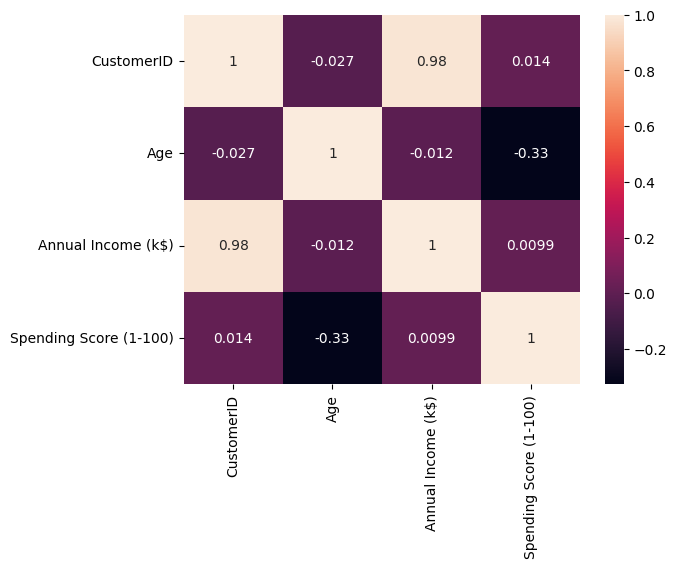

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Clustering - Univariate, Bivariate

<p style="color: white; background-color: #333333; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    We apply K-Means Clustering on Annual Income to segment customers into groups. After training the model with 6 clusters, we assign each customer a cluster label and analyze the cluster distribution. We then calculate the inertia (within-cluster variation) to assess clustering quality. Finally, using the Elbow Method, we determine the optimal number of clusters by plotting inertia scores for different cluster counts.
</p>


In [14]:
clustering1 = KMeans(n_clusters=6)

In [15]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [16]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4])

In [17]:
df['Income Cluster'] = clustering1.labels_

In [18]:
df.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Income Cluster  
195               4  
196               4  
197               4  
198               4  
199               4

In [19]:
df['Income Cluster'].value_counts()

Income Cluster
2    48
0    42
5    42
3    32
1    28
4     8
Name: count, dtype: int64

In [20]:
clustering1.inertia_

5050.9047619047615

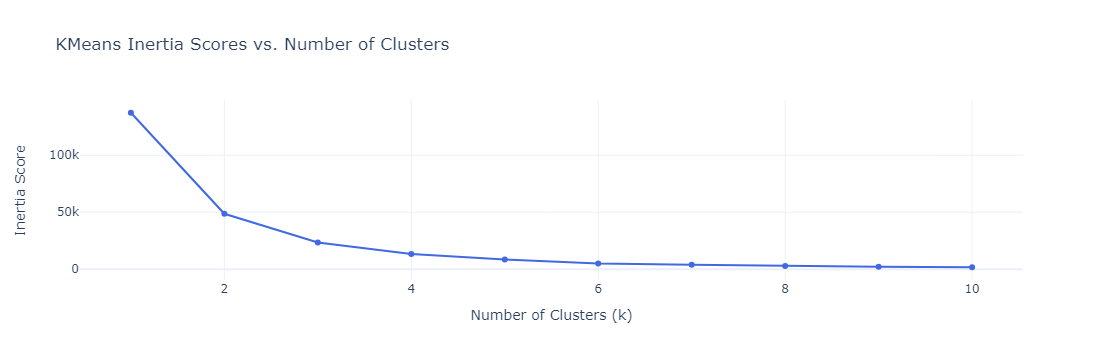

In [33]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is already defined and contains 'Annual Income (k$)' column
inertia_scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

# Create the line plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, 11)),
    y=inertia_scores,
    mode='lines+markers',
    name='Inertia Scores',
    line=dict(color='royalblue', width=2),
    marker=dict(color='royalblue', size=6)
))

# Add title and labels
fig.update_layout(
    title='KMeans Inertia Scores vs. Number of Clusters',
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Inertia Score',
    template='plotly_white'
)

# Show the plot
fig.show()


In [24]:
 df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [25]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               43.000000           42.238095               50.666667
1               38.214286           93.000000               50.928571
2               41.604167           60.083333               49.041667
3               34.906250           22.000000               49.656250
4               36.500000          124.000000               49.625000
5               35.428571           75.095238               51.095238


<p style="color: black; background-color: #f0f0f0; padding: 10px; border: 2px solid #4CAF50; border-radius: 5px;">
    we apply K-Means Clustering with 5 clusters using both Annual Income and Spending Score to group customers based on these two variables. The cluster labels are stored in a new column, and we analyze the data to see the segmentation. Additionally, we calculate the inertia scores for different numbers of clusters and plot them to determine the optimal cluster count using the Elbow Method.

In [26]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  Spending and Income Cluster  
0               3                            4  
1               3                            3  
2               3                            4  
3               3                            3  
4               3                            4

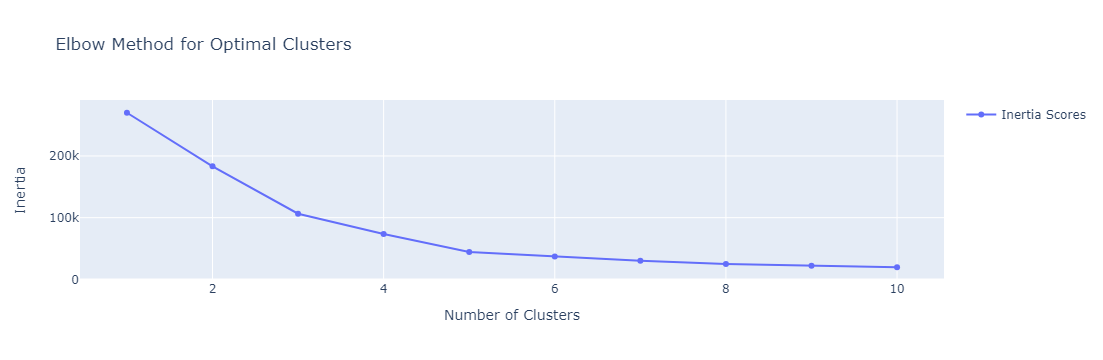

In [32]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your dataframe containing 'Annual Income (k$)' and 'Spending Score (1-100)'

inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

# Create the plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, 11)),
    y=inertia_scores2,
    mode='lines+markers',
    name='Inertia Scores'
))

# Add titles and labels
fig.update_layout(
    title='Elbow Method for Optimal Clusters',
    xaxis_title='Number of Clusters',
    yaxis_title='Inertia',
    showlegend=True
)

# Show the plot
fig.show()


In [28]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

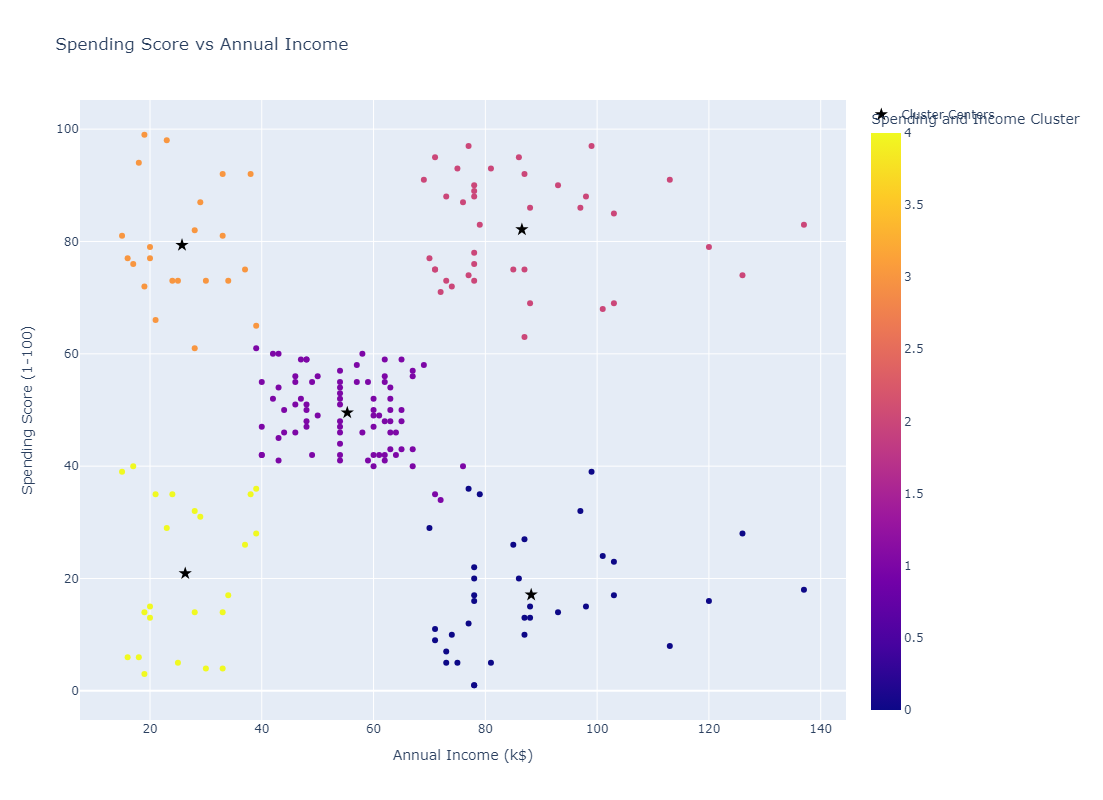

In [31]:
import plotly.express as px
import plotly.graph_objects as go

# Create the scatter plot for clusters using Plotly
fig = px.scatter(df, 
                 x='Annual Income (k$)', 
                 y='Spending Score (1-100)', 
                 color='Spending and Income Cluster', 
                 color_discrete_sequence=px.colors.qualitative.Set2,
                 title="Spending Score vs Annual Income")

# Add cluster centers with black star markers
fig.add_trace(go.Scatter(x=centers['x'], 
                         y=centers['y'], 
                         mode='markers', 
                         marker=dict(size=10, color='black', symbol='star'), 
                         name='Cluster Centers'))

# Update layout
fig.update_layout(width=1000, height=800)

# Show plot
fig.show()
